## Problem specification and Data set Description

Problems of real-life complexity are needed to test and compare various data mining and pattern recognition methods. The proposed database can be used to solve two practically important problems: predicting complications of Myocardial Infarction (MI) based on information about the patient 
- at the time of admission and 
- on the third day of the hospital period. Another important group of tasks is phenotyping of disease (cluster analysis), dynamic phenotyping (filament extraction and identification of disease trajectories) and visualisation (disease mapping).

MI is one of the most challenging problems of modern medicine. Acute myocardial infarction is associated with high mortality in the first year after it. The incidence of MI remains high in all countries. This is especially true for the urban population of highly developed countries, which is exposed to chronic stress factors, irregular and not always balanced nutrition. In the United States, for example, more than a million people suffer from MI every year, and 200-300 thousand of them die from acute MI before arriving at the hospital.
The course of the disease in patients with MI is different. MI can occur without complications or with complications that do not worsen the long-term prognosis. At the same time, about half of patients in the acute and subacute periods have complications that lead to worsening of the disease and even death. Even an experienced specialist can not always foresee the development of these complications. In this regard, predicting complications of myocardial infarction in order to timely carry out the necessary preventive measures is an important task.

Problems to solve
In general columns 2-112 can be used as input data for prediction. Possible complications (outputs) are listed in columns 113-124.
There are four possible time moments for complication prediction: on base of the information known at
1. the time of admission to hospital: 
    
    all input columns (2-112) except 93, 94, 95, 100, 101, 102, 103, 104, 105 can be used for prediction;
2. the end of the first day (24 hours after admission to the hospital):
    
    all input columns (2-112) except 94, 95, 101, 102, 104, 105 can be used for prediction;
3. the end of the second day (48 hours after admission to the hospital) :
    
    all input columns (2-112) except 95, 102, 105 can be used for prediction;
4. the end of the third day (72 hours after admission to the hospital):
    
    all input columns (2-112) can be used for prediction.

## Importing the Required Libraries

In [1]:
import pandas as pd # algebraic computations , read and write to csv 

import numpy as np # linear algebra and arrays muniplication 

import time                               # measure excution time of some functions

############  importing the data visualization libraries :##############

import matplotlib.pyplot as plt
import seaborn as sns

############  Import Classifiers #################

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB

# Importing a model to split the training set from the evaluation set
from sklearn.model_selection import train_test_split 

############  Evaluation Metric  #################
from sklearn.metrics import f1_score , make_scorer

############  GridSearchCV #################
from sklearn.model_selection import GridSearchCV

### 1- Data Exploration

In [2]:
# read the data set and save it in a Pandas Data frame format 
df = pd.read_csv('./Myocardial infarction complications Database.csv')

In [3]:
print(f'the data set is of shape {df.shape} \n')
df.head(5)

the data set is of shape (1700, 124) 



,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#  exploring general Features Data types
# The data set contains  float64(110), int64(14) Features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


In [5]:
# exploring general statistics about the data set ( Features Data types, Mean , Max , min ....)
# we can see that some features clearly contain NAN values
df.describe()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1700.000000,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,850.500000,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,...,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,490.892045,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,...,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,425.750000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,850.500000,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1275.250000,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1700.000000,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
df.shape

(1700, 124)

In [7]:
# splitting the features from targets 
features_Indc = np.arange(0,113)
Target_Indc = np.arange(113,124)
df_targets  = df.iloc[: , Target_Indc]
df_features  = df.iloc[: , features_Indc]

In [8]:
# The target variables doesn't contain any missing values
df_targets.isna().sum()

PREDS_TAH     0
JELUD_TAH     0
FIBR_JELUD    0
A_V_BLOK      0
OTEK_LANC     0
RAZRIV        0
DRESSLER      0
ZSN           0
REC_IM        0
P_IM_STEN     0
LET_IS        0
dtype: int64

In [9]:
df_targets.nunique()

PREDS_TAH     2
JELUD_TAH     2
FIBR_JELUD    2
A_V_BLOK      2
OTEK_LANC     2
RAZRIV        2
DRESSLER      2
ZSN           2
REC_IM        2
P_IM_STEN     2
LET_IS        8
dtype: int64

#### - Missing values 

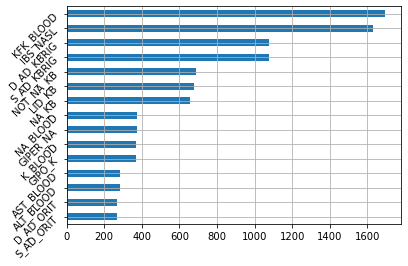

In [10]:
# show the top 15 features with missing values 
df_features.isna().sum(axis=0).nlargest(15).sort_values().plot(kind='barh')
plt.grid()
plt.yticks(rotation=45)
plt.show()

In [11]:
# extract the features with very high percentage of missing values 
# we make a function to map the features with high numbe of NAN to 'Nan' and 'OK' otherwise
def ExtractNans(x):
    isnan = False
    if x > 0.3 :
        isnan = True
    return isnan
df_sorted_by_nans = df_features.isna().sum(axis=0).divide(len(df_features)).sort_values(ascending=False)

In [12]:
# we found 7 features with more than 30% of NANs 
df_sorted_by_nans.apply(ExtractNans).sum(axis=0)

7

In [13]:
# to drop these features we need to extract the feature names and save it to a list 
f_to_drop = df_sorted_by_nans[df_sorted_by_nans.apply(ExtractNans) == True].index.tolist()
print(f_to_drop)

['KFK_BLOOD', 'IBS_NASL', 'S_AD_KBRIG', 'D_AD_KBRIG', 'NOT_NA_KB', 'LID_KB', 'NA_KB']


#### - Cardinality check :

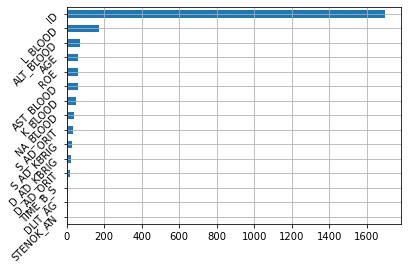

ID               1700
L_BLOOD           174
ALT_BLOOD          69
AGE                62
ROE                58
                 ... 
ritm_ecg_p_04       2
ritm_ecg_p_02       2
ritm_ecg_p_01       2
IM_PG_P             2
n_r_ecg_p_09        2
Length: 124, dtype: int64

In [14]:
# plot the feature cardinality in descending order
df_features.nunique().nlargest(15).sort_values().plot(kind='barh')
plt.grid()
plt.yticks(rotation=45)
plt.show()
df.nunique().sort_values(ascending=False)

In [15]:
# extract the Binary features 
feature_cardinality = df_features.nunique()
Binary = feature_cardinality[feature_cardinality == 2].index.tolist()
print(f'We found {len(Binary)} Binary_features including : \n {Binary[:10]} ....' )

We found 79 Binary_features including : 
 ['SEX', 'IBS_NASL', 'SIM_GIPERT', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08'] ....


#### - Duplicates Removal

In [16]:
# we must drop the ID beacuse it's unique for each record 
# we will extract the duplicated records ( records that are Identical in both features and lables)
dup = df_features.drop(columns=['ID'] , axis=0).duplicated().sum()
print(f'the number of dublicated records in the data set = {dup} records')

the number of dublicated records in the data set = 0 records


## Data Preprocessing 


in general there are some preprocessing can be applied despite of the case we are examining :

#### 1-Handling missing values:


In [19]:
# Remove columns with many NANs :
f_to_drop.append('ID')
print(f'The dropped columns are {f_to_drop}')
df_features = df_features.drop(columns = f_to_drop , axis = 0)

The dropped columns are ['KFK_BLOOD', 'IBS_NASL', 'S_AD_KBRIG', 'D_AD_KBRIG', 'NOT_NA_KB', 'LID_KB', 'NA_KB', 'ID', 'ID']


In [21]:
df_features.shape

(1700, 105)

- Filling missing values  :


###### A- Binary Fearutes

In [22]:
feature_cardinality = df_features.nunique()
Binary_features = feature_cardinality[feature_cardinality == 2].index.tolist()
len(Binary_features)

75

In [23]:
df_features[Binary_features].isna().sum().sort_values(ascending = False)*100/len(df_features)

GIPER_NA         22.058824
GIPO_K           21.705882
ritm_ecg_p_08     8.941176
ritm_ecg_p_01     8.941176
ritm_ecg_p_04     8.941176
                   ...    
zab_leg_03        0.411765
zab_leg_04        0.411765
IM_PG_P           0.058824
SEX               0.000000
FIBR_PREDS        0.000000
Length: 75, dtype: float64

In [24]:
# In order to avoid Biasing the data we can not choose 1 or zero as fixed value to be filled with
# we can not use sklearn imputers here since it will either :
# average the values of the knighbours (KNN imputer) - take the mean or most frequent (simple imputer)
# we will choose forward fill just to add randomness to the filling process 
df_features[Binary_features] = df_features[Binary_features].fillna(method='ffill')

###### B- Float Fearutes

In [25]:
float_features = [x for x in df_features.columns.tolist() if x not in Binary_features]
print(f'The data set has {len(float_features)} not binary features most of them contain missing values') 

The data set has 30 not binary features most of them contain missing values


In [26]:
df[float_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AGE         1692 non-null   float64
 1   INF_ANAM    1696 non-null   float64
 2   STENOK_AN   1594 non-null   float64
 3   FK_STENOK   1627 non-null   float64
 4   IBS_POST    1649 non-null   float64
 5   GB          1691 non-null   float64
 6   DLIT_AG     1452 non-null   float64
 7   ZSN_A       1646 non-null   float64
 8   S_AD_ORIT   1433 non-null   float64
 9   D_AD_ORIT   1433 non-null   float64
 10  ant_im      1617 non-null   float64
 11  lat_im      1620 non-null   float64
 12  inf_im      1620 non-null   float64
 13  post_im     1628 non-null   float64
 14  K_BLOOD     1329 non-null   float64
 15  NA_BLOOD    1325 non-null   float64
 16  ALT_BLOOD   1416 non-null   float64
 17  AST_BLOOD   1415 non-null   float64
 18  L_BLOOD     1575 non-null   float64
 19  ROE         1497 non-null  

In [28]:
# we choose the simple imputer with filling with mean strategy 
# since we already filled the binary columns we can apply sklearn simple imputer to the entire data frame 
# we loop Through the columns  compute the mean and fill all NANs with the mean 
for c in float_features :
    mean = df_features[c].mean()
    df_features[c] = df_features[c].fillna(value= mean)

In [32]:
# df_features.isna().sum().sort_values(ascending = False)
